In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_errno.csv")
test = pd.read_csv("data/test_df.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

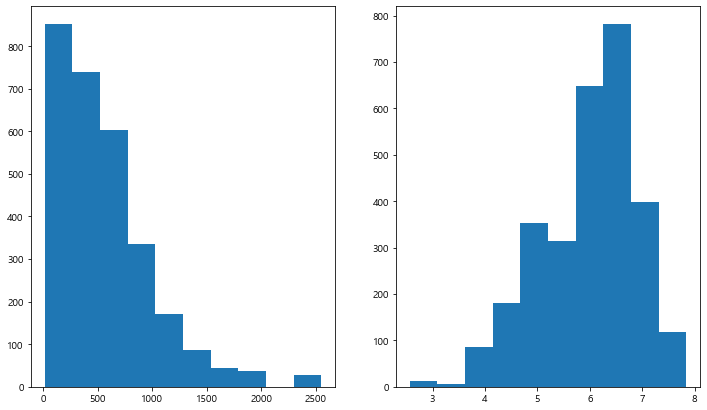

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

In [7]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


## 결측치 처리

### 자격유형

In [8]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      4
단지내주차면수         0
dtype: int64

In [9]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3092,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3154,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [10]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3089,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
3090,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
3091,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
3092,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3093,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [11]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3154,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
3155,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
3156,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [12]:
all_df.loc[ 3092, "자격유형"] = 'A'
all_df.loc[ 3154, "자격유형"] = 'C'

### 임대보증금

In [13]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 14)
변경후
(0, 14)


In [14]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [15]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(27, 14)
변경후
(0, 14)


In [16]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [17]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [18]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3904 non-null   object 
 1   총세대수        3904 non-null   int64  
 2   임대건물구분      3904 non-null   object 
 3   지역          3904 non-null   object 
 4   공급유형        3904 non-null   object 
 5   전용면적        3904 non-null   float64
 6   전용면적별세대수    3904 non-null   int64  
 7   공가수         3904 non-null   float64
 8   자격유형        3904 non-null   object 
 9   임대보증금       3904 non-null   int32  
 10  임대료         3904 non-null   int32  
 11  10분내지하철수    3655 non-null   float64
 12  10분내버스정류장수  3900 non-null   float64
 13  단지내주차면수     3904 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 396.6+ KB


### 10분내 지하철 수

In [19]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

249
변경후
0


In [20]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0


In [21]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    4
단지내주차면수       0
dtype: int64

In [22]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.002576
전용면적          0.002303
전용면적별세대수      0.040635
공가수           0.038906
임대보증금         0.111246
임대료           0.082342
10분내지하철수      0.057986
10분내버스정류장수    1.000000
단지내주차면수       0.097617
Name: 10분내버스정류장수, dtype: float64

In [23]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2800,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2801,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,37650,0.0,3.0,842.0,448.0
2802,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,37650,0.0,3.0,842.0,448.0


In [24]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

3.996268656716418

In [25]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [26]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [27]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [28]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [29]:
all_df.shape

(3904, 14)

In [30]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0


In [31]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0,0,0.0,1.0,467.0,1,1,9
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [32]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [33]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [34]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [35]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [36]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [37]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3899         100
3900     6978500
3901     6978500
3902    13554700
3903    18855600
Name: 환산보증금, Length: 3904, dtype: int32

(array([  3.,  12.,  26.,  31., 265., 468., 831., 937., 899., 432.]),
 array([2.63905733, 3.12465022, 3.61024311, 4.095836  , 4.58142889,
        5.06702178, 5.55261467, 6.03820756, 6.52380045, 7.00939334,
        7.49498623]),
 <BarContainer object of 10 artists>)

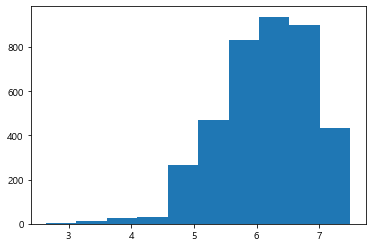

In [38]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
plt.hist(all_df['log_단지내주차면수'])

In [39]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1,3.0,9299040,6.437752
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,36.77,126.0,38.0,12,0,0,0.0,1.0,467.0,1,1,9,86,2,1.0,100,6.148468
3900,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,381,0,1.0,6978500,5.707110
3901,C2189,382,29.19,20.0,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1,381,0,1.0,6978500,5.707110
3902,C2189,382,39.45,202.0,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1,381,0,1.0,13554700,5.707110


In [40]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   단지코드         3904 non-null   category
 1   총세대수         3904 non-null   int64   
 2   임대건물구분       3904 non-null   object  
 3   지역           3904 non-null   object  
 4   공급유형         3904 non-null   object  
 5   전용면적         3904 non-null   float64 
 6   전용면적별세대수     3904 non-null   float32 
 7   공가수          3904 non-null   float64 
 8   자격유형         3904 non-null   int32   
 9   임대보증금        3904 non-null   int32   
 10  임대료          3904 non-null   int32   
 11  10분내지하철수     3904 non-null   float64 
 12  10분내버스정류장수   3904 non-null   float64 
 13  단지내주차면수      3904 non-null   float64 
 14  임대건물구분_lbl   3904 non-null   int64   
 15  지역_lbl       3904 non-null   int64   
 16  공급유형_lbl     3904 non-null   int64   
 17  단지코드_lbl     3904 non-null   int16   
 18  qcut_총세대수    3904 non-null  

In [41]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [42]:
train.corr()['등록차량수']

총세대수          0.333440
전용면적          0.112717
전용면적별세대수      0.250513
공가수           0.118910
10분내지하철수     -0.107308
10분내버스정류장수    0.104135
단지내주차면수       0.861338
등록차량수         1.000000
Name: 등록차량수, dtype: float64

(array([3.266e+03, 4.760e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

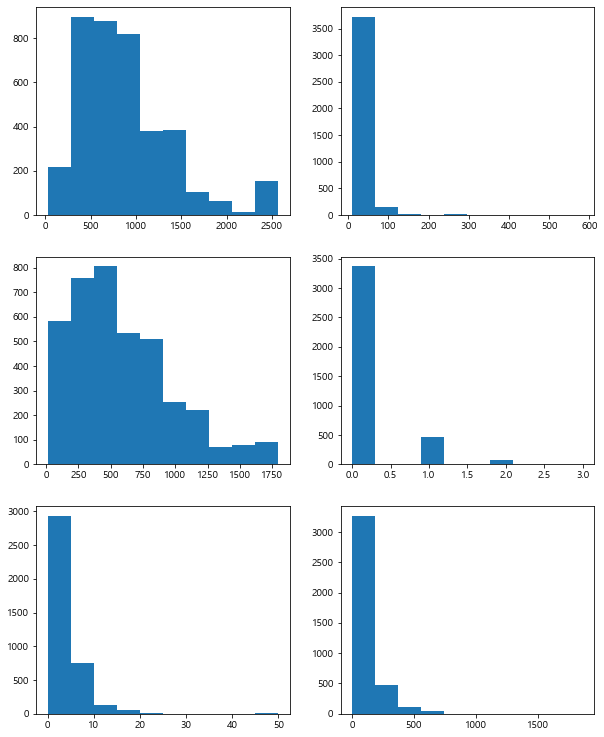

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

In [44]:
train_df = all_df_last.iloc[0:2896,:]
test_df = all_df_last.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1,3.0,9299040,6.437752,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,49.20,19.0,7.0,1,11346000,116090,0.0,1.0,166.0,1,5,1,501,0,3.0,11462190,5.117994,146.0
2892,C2532,239,51.08,34.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,14147410,5.117994,146.0
2893,C2532,239,51.73,34.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,14147410,5.117994,146.0
2894,C2532,239,51.96,114.0,7.0,1,14005000,142310,0.0,1.0,166.0,1,5,1,501,0,3.0,14147410,5.117994,146.0


In [45]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [46]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수           0.333440
전용면적           0.112717
전용면적별세대수       0.250513
공가수            0.118910
자격유형          -0.154482
임대보증금          0.435523
임대료            0.529219
10분내지하철수      -0.085468
10분내버스정류장수     0.104200
단지내주차면수        0.861338
임대건물구분_lbl    -0.449130
지역_lbl         0.060674
공급유형_lbl      -0.137277
단지코드_lbl      -0.062077
qcut_총세대수      0.401309
단지코드_Type      0.109893
환산보증금          0.437217
log_단지내주차면수    0.784630
등록차량수          1.000000
log_등록차량수      0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수           0.228964
전용면적           0.111644
전용면적별세대수       0.274772
공가수            0.200793
자격유형          -0.239157
임대보증금          0.458732
임대료            0.557954
10분내지하철수      -0.088560
10분내버스정류장수     0.080122
단지내주차면수        0.805096
임대건물구분_lbl    -0.596565
지역_lbl         0.108532
공급유형_lbl      -0.291515
단지코드_lbl      -0.065896
qcut_총세대수      0.303550
단지코드_Type      0.093261
환산보증금          0.460520
log_단지내주차면수    0.879539
등록차량수          0.881679
log

In [47]:
pd.set_option('display.max_columns',500)

In [48]:
train_df.head()

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1,3.0,9299040,6.437752,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1,3.0,12779230,6.437752,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1,3.0,18582860,6.437752,205.0,5.327876


In [49]:
train_df.isnull().sum()

단지코드           0
총세대수           0
전용면적           0
전용면적별세대수       0
공가수            0
자격유형           0
임대보증금          0
임대료            0
10분내지하철수       0
10분내버스정류장수     0
단지내주차면수        0
임대건물구분_lbl     0
지역_lbl         0
공급유형_lbl       0
단지코드_lbl       0
qcut_총세대수      0
단지코드_Type      0
환산보증금          0
log_단지내주차면수    0
등록차량수          0
log_등록차량수      0
dtype: int64

In [50]:
sel = [ '총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type']

lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [52]:
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
# print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

In [53]:
# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
# print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

In [54]:
# # 교차 검증으로 확인
# import time
# now_time = time.time()

# model_RF = RandomForestRegressor(n_estimators = 1000, 
#                                  random_state=0, n_jobs=-1)
# model_RF.fit(X_train, y_train)
# score = cross_val_score(model_RF, X_train, y_train, 
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error, 검증 5번 함 MAE 값으로 뽑음
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수

# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

In [55]:
# # 교차 검증으로 확인
# import time
# now_time = time.time()

# model_RF = RandomForestRegressor(n_estimators = 1000, 
#                                  random_state=0, n_jobs=-1)
# model_RF.fit(X_train, y_train)
# score = cross_val_score(model_RF, X_train, y_train, 
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error, 검증 5번 함 MAE 값으로 뽑음
# m_score = (score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수

# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

## GradientBoosting 모델

In [56]:
# now_time = time.time()
# m_gb = GradientBoostingRegressor(n_estimators = 2000,
#                                  random_state=0)
# m_gb.fit(X_train, y_train)
# score = cross_val_score(m_gb, X_train, y_train,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.0349602038660234
* 166.57256889343262

## Randomforest 모델

In [57]:
# m_rf = RandomForestRegressor(n_estimators = 2000,
#                                  random_state=0, n_jobs=-1)
# m_rf.fit(X, y)
# score = cross_val_score(m_rf, X, y,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.3236266790461696
* 339.8584678173065


## lgbm 모델

In [62]:
#기본
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.05,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 5000}

In [63]:
import lightgbm as lgb 
import time
ow_time = time.time()
now_time = time.time()

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time

print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

291.19332003593445
LightGBM Score : 0.03044704992563132


##### 기본
* 873.3915276527405
* LightGBM Score : 0.04459292096438179

##### 모델 변경 후
* 206.89227724075317
* LightGBM Score : 0.04459292096438179 => 제출하니깐 108.37885

##### hyperparameters : learning_rate를 0.013-> 0.05로 변경
* 4795.224135637283
* LightGBM Score : 0.03199481828403217

##### hyperparameters : n_estimators를  1000-> 2000로 변경
* 237.71166443824768
* LightGBM Score : 0.030781955694238812

##### 변수 추가 : 임대보증금, 임대료
'총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금', '임대료',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
* 0.035 어쩌고 였던듯...

##### 변수 추가 : 환산보증금
'총세대수', '전용면적', '공가수', '단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 1090.4661061763763
* LightGBM Score : 0.03704474568887008

##### 변수 변경: 단지내주차면수 => log_단지내주차면수,'환산보증금'
'총세대수', '전용면적', '공가수', 'log_단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 412.050110578537
* LightGBM Score : 0.037043681164248346

##### 변수 변경
* 117.3158769607544
* LightGBM Score : 0.030782037491727067

##### 'n_estimators': 5000 로 변경
* 291.19332003593445
* LightGBM Score : 0.03044704992563132

# 최종모델 만들기

In [ ]:
model_last = lgb.LGBMRegressor(n_estimators = 1000,
                                 random_state=0, n_jobs=-1)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

In [ ]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

In [ ]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [ ]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

In [ ]:
sub_df.to_csv('6th_lgbm_0721.csv', index=False)
sub_df.head()